<a href="https://colab.research.google.com/github/iis-siium/GSN_1_zima_2020_homework_Magdalena27/blob/master/Transfer_learning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
# import sys
import keras
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot
from matplotlib.image import imread
# from os import listdir
# from numpy import asarray
# from numpy import save
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from numpy import load
# from os import makedirs
# from shutil import copyfile
# from random import seed
# from random import random
from tensorflow import keras
# from matplotlib import pyplot
from keras.utils import to_categorical
# from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D, Activation
from PIL import Image, ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras import optimizers
from keras.applications.vgg16 import VGG16
# from keras.models import Sequential
from keras.layers import Dense, #Dropout, Flatten, Activation
# from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

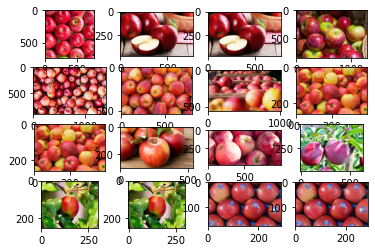

In [14]:
path = '/content/gdrive/My Drive/Colab Notebooks/lab2_dataset/apples/'

for i in range(16):
    plt.subplot(4,4, i+1)
    filename = path + 'image_a' + str(i+1) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

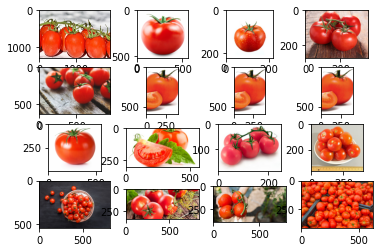

In [15]:
path = '/content/gdrive/My Drive/Colab Notebooks/lab2_dataset/tomatoes/'

for i in range(16):
    plt.subplot(4,4, i+1)
    filename = path + 'image_p' + str(i+1) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
plt.show()

In [16]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
# TRANSFER LEARNING

input_vgg = vgg.input

# dodanie warstwy Dense z dwoma neuronami (num_classes)
num_classes = 2 
new_classification_layer = Dense(num_classes, activation='softmax', name='predictions')

# łączenie nowej warstwy z przedostatnią warstwą w VGG
output_vgg = new_classification_layer(vgg.layers[-2].output)

model = Model(input_vgg, output_vgg, name = "VGG")

In [18]:
# zamrożenie warstw (oprócz ostatniej) podczas treningu
for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = False


# upewniamy się, że ostatnia warstwa nie jest zamrożona i bierze udział w treningu
for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "VGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0       

In [19]:
datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1, 
      zoom_range=0.1,  
      horizontal_flip=True, 
      vertical_flip=False, 
      rescale=1.0/255.0, 
      validation_split=0.2)
      
training_generator = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/lab2_dataset/', class_mode='categorical', batch_size=64, target_size=(224, 224), subset='training')
validation_generator = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/lab2_dataset/', class_mode='categorical', batch_size=64, target_size=(224, 224), subset='validation')

Found 321 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [20]:
# RMSprop(lr=0.0001, decay=1e-6)

history = model.fit(training_generator, validation_data = validation_generator, epochs=10, verbose=1)
scores = model.evaluate(validation_generator, verbose=1)
print('Test loss: %.2f' % scores[0])
print('Test accuracy: %.2f' % (scores[1] * 100.0))
    
model.save_weights('VGG_transfer_learning.h5') 

Epoch 1/10
6/6 [==============================] - 57s 10s/step - loss: 0.7245 - accuracy: 0.5263 - val_loss: 0.8179 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 9s 1s/step - loss: 0.7953 - accuracy: 0.4457 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 0.6770 - accuracy: 0.5572 - val_loss: 0.7983 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 0.7134 - accuracy: 0.5150 - val_loss: 0.7387 - val_accuracy: 0.4750
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.6607 - accuracy: 0.6230 - val_loss: 0.7273 - val_accuracy: 0.5125
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 0.6635 - accuracy: 0.5983 - val_loss: 0.7000 - val_accuracy: 0.5250
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.6408 - accuracy: 0.6316 - val_loss: 0.7459 - val_accuracy: 0.4875
Epoch 8/10
6/6 [=======================

In [21]:
# FINE TUNING - ostateczna poprawa wag w sieci = > nie za długo, pozwoli na poprawę skuteczności w niewielkim stopniu, ale dostosuje sieć do naszego datasetu

# odblokowanie warstw podczas treningu 
for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = True

# upewniamy się, że ostatnia warstwa nie jest zamrożona i bierze udział w treningu
for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True

opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "VGG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0       

In [23]:
history = model.fit(training_generator, validation_data = validation_generator, epochs=4, verbose=1)
scores = model.evaluate(validation_generator, verbose=1)
print('Test loss: %.2f' % scores[0])
print('Test accuracy: %.2f' % (scores[1] * 100.0))
    
model.save_weights('model_VGG_fine_tuning.h5')   

Epoch 1/4
6/6 [==============================] - 18s 2s/step - loss: 1.5050 - accuracy: 0.6698 - val_loss: 0.6179 - val_accuracy: 0.6500
Epoch 2/4
6/6 [==============================] - 11s 2s/step - loss: 0.4933 - accuracy: 0.7256 - val_loss: 1.1057 - val_accuracy: 0.5250
Epoch 3/4
6/6 [==============================] - 10s 2s/step - loss: 0.6236 - accuracy: 0.7209 - val_loss: 0.8979 - val_accuracy: 0.6125
Epoch 4/4
2/2 [==============================] - 2s 234ms/step - loss: 0.5892 - accuracy: 0.7500
Test loss: 0.59
Test accuracy: 75.00
